<a href="https://colab.research.google.com/github/SamdRb/Python-Projects/blob/main/RNN_SamDarabi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Appliances_Energy_Prediction_Dataset.csv',index_col="date",parse_dates=True)

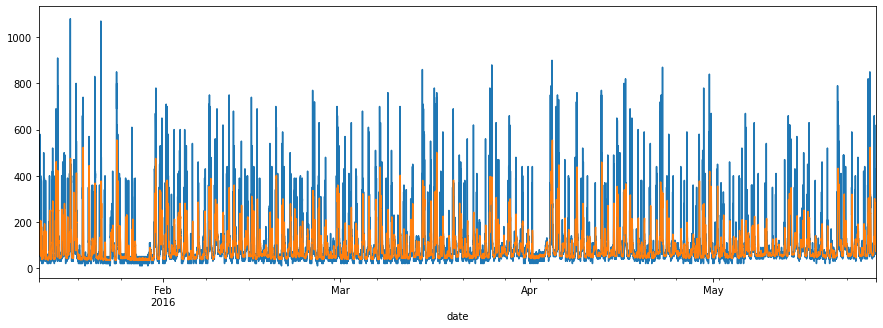

In [ ]:
# Moving Average
rolling_mean = dataset.Appliances.rolling(window=10).mean()
dataset.Appliances.plot()
rolling_mean.plot(figsize=(15,5))


In [ ]:
# Data Preprocessing (Data transformation: Data Normalization and Data integration)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [ ]:
X = []
y = []
for i in range(10, dataset_scaled.shape[0]-1):
    X.append(dataset_scaled[i-10:i, :])
    y.append(dataset_scaled[i+1, 0])
X, y = np.array(X), np.array(y)

In [ ]:
# Deviding the dataset into training and testing sets
X_train = X[:17000]
y_train = y[:17000]
X_test = X[17000:]
y_test = y[17000:]

In [ ]:
# Training Neural Network
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
model = Sequential()

model.add(LSTM(50 , return_sequences = True, input_shape = (X_train.shape[1], 28)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error' , optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=40)

Epoch 1/40
532/532 [==============================] - 15s 19ms/step - loss: 0.0095 - accuracy: 5.2941e-04
Epoch 2/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0092 - accuracy: 5.2941e-04
Epoch 3/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0091 - accuracy: 5.2941e-04
Epoch 4/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0090 - accuracy: 5.2941e-04
Epoch 5/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0089 - accuracy: 5.2941e-04
Epoch 6/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0088 - accuracy: 5.2941e-04
Epoch 7/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0087 - accuracy: 5.2941e-04
Epoch 8/40
532/532 [==============================] - 10s 19ms/step - loss: 0.0087 - accuracy: 5.2941e-04
Epoch 9/40
532/532 [==============================] - 10s 18ms/step - loss: 0.0086 - accuracy: 5.2941e-04
Epoch 10/40
532/532 [=========================

In [ ]:
y_train_predicted = model.predict(X_train)

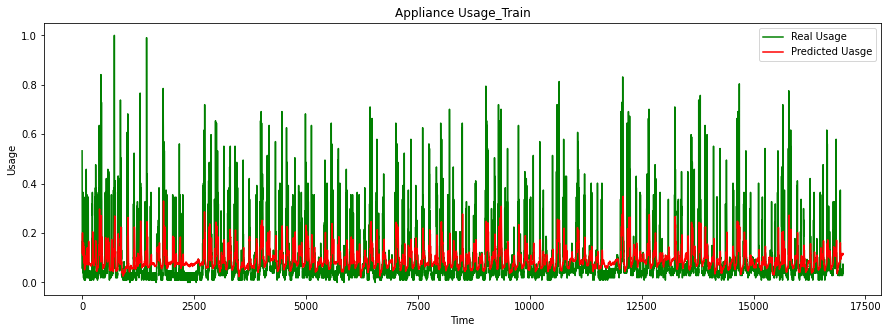

In [ ]:
# Performance on Training Set
plt.figure(figsize=(15,5))
plt.plot(y_train, color = 'green', label = 'Real Usage' )
plt.plot(y_train_predicted, color = 'red', label = 'Predicted Uasge')
plt.title('Appliance Usage_Train')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()

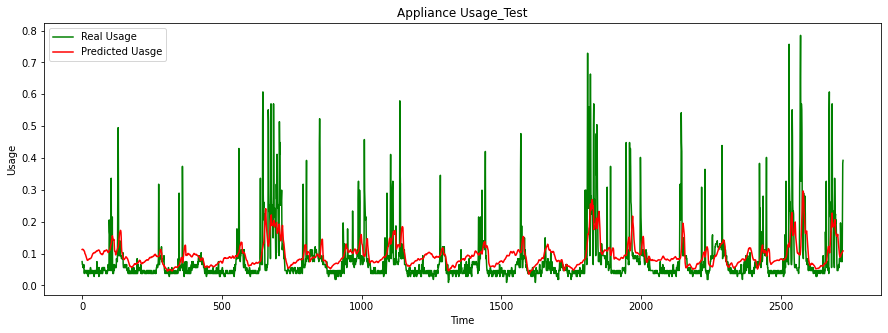

In [ ]:
# Performance on Test Set
y_test_predicted = model.predict(X_test)
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'green', label = 'Real Usage' )
plt.plot(y_test_predicted, color = 'red', label = 'Predicted Uasge')
plt.title('Appliance Usage_Test')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()

In [ ]:
# Second Trial 
X_train_2 = dataset_scaled[:17000]
y_train_2 = dataset_scaled[:17000,0]
X_test_2 = dataset_scaled[17000:]
y_test_2 = dataset_scaled[17000:,0]
X_train_2 = X_train_2.reshape((-1,1,28))
X_test_2 = X_test_2.reshape((-1,1,28))



In [ ]:
# Training the Model
model = Sequential()

model.add(LSTM(50, input_shape = (X_train_2.shape[1], 28)))
model.add(Dense(1))

model.compile(loss='mean_squared_error' , optimizer='sgd', metrics=['accuracy'])
model.fit(X_train_2, y_train_2, batch_size=1, epochs=10)

Epoch 1/10
17000/17000 [==============================] - 34s 2ms/step - loss: 0.0065 - accuracy: 5.2941e-04
Epoch 2/10
17000/17000 [==============================] - 33s 2ms/step - loss: 0.0014 - accuracy: 5.8824e-04
Epoch 3/10
17000/17000 [==============================] - 32s 2ms/step - loss: 1.9712e-04 - accuracy: 5.8824e-04
Epoch 4/10
17000/17000 [==============================] - 34s 2ms/step - loss: 5.6716e-05 - accuracy: 5.8824e-04
Epoch 5/10
17000/17000 [==============================] - 32s 2ms/step - loss: 3.2659e-05 - accuracy: 5.8824e-04
Epoch 6/10
17000/17000 [==============================] - 33s 2ms/step - loss: 2.4141e-05 - accuracy: 5.8824e-04
Epoch 7/10
17000/17000 [==============================] - 33s 2ms/step - loss: 1.9576e-05 - accuracy: 5.8824e-04
Epoch 8/10
17000/17000 [==============================] - 32s 2ms/step - loss: 1.6660e-05 - accuracy: 5.8824e-04
Epoch 9/10
17000/17000 [==============================] - 32s 2ms/step - loss: 1.4655e-05 - accuracy: 5.

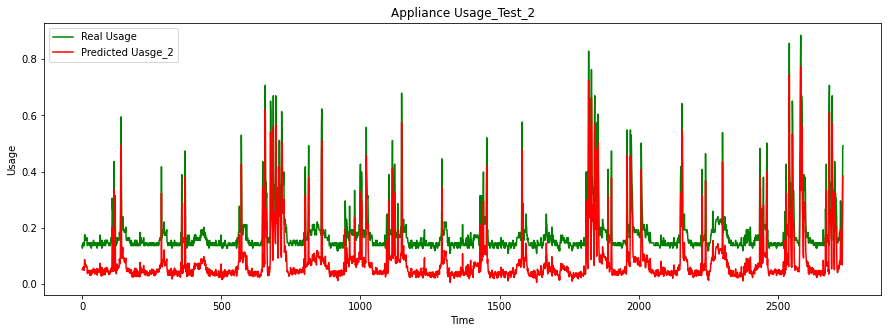

In [ ]:
# Performance on Test Set 2
y_test_predicted_2 = model.predict(X_test_2)
plt.figure(figsize=(15,5))
plt.plot(y_test_2+0.1, color = 'green', label = 'Real Usage' )
plt.plot(y_test_predicted_2, color = 'red', label = 'Predicted Uasge_2')
plt.title('Appliance Usage_Test_2')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()
plt.show()